# HIV Model

Griffith Stites

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [84]:
def plot_resultsV(R, L, E, V):
    """Plot the results of a the HIV model
    
    R: TimeSeries
    L: TimeSeries
    E: TimeSeries
    V: TimeSeries
    """
    plot(V, '--', label='V - Free Virons')
    decorate(xlabel='Time (days)',
             ylabel='Population')

In [85]:
def plot_resultsRLE(R, L, E, V):
    """Plot the results of a the HIV model
    
    R: TimeSeries
    L: TimeSeries
    E: TimeSeries
    V: TimeSeries
    """
    plot(R, '--', label='R -CD4 Lymphocytes')
    plot(L, '-', label='L - Latently Infected')
    plot(E, ':', label='E - Activacted')
    decorate(xlabel='Time (days)',
             ylabel='Population')

In [77]:
def run_simulation(state, system, update_func):
    """Runs a simulation of the system.
    
    state: State object
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    frame = TimeFrame(columns=initial.index)
    frame.row[t_0] = initial
    
    for t in linrange(t_0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], dt, system)
    
    return frame

In [75]:
def update_func(state, dt, system):
    """Update the populations of the system.
    
    state: State (R,L,E,V)
    dt = time to update over
    system: System object (gamma, tau, mu, betaV, rho, alpha, delta, omicron)
    
    returns: State (sir)
    """
    R, L, E, V = state
    unpack (system)
    
    changeR = (gamma*tau - mu*R - beta*R*V) * dt
    changeL = (rho*beta*R*V - mu*L - alpha*L) * dt
    changeE = ((1-rho)*beta*R*V + alpha*L - delta*E) * dt
    changeV = (pi*E - sigma*V) * dt
    
    R += changeR
    L += changeL
    E += changeE
    V += changeV
    
    return State(R=R,L=L,E=E,V=V)

In [69]:
uninfectedCD4lymphoncytes = 200
latentlyInfected = 0 #"there were initially no infected cells. Second paragraph"
activated = 0 #Same source as above for defending 0
freeVirions = 100

initial = State(R = uninfectedCD4lymphoncytes,
                L=latentlyInfected, 
                E=activated,
                V=freeVirions)

,values
R,200
L,0
E,0
V,100


In [70]:
# Values per day

system=System(gamma=1.36, 
              tau=.2, 
              mu=1.36e-3, 
              beta=.00027, 
              rho=.1, 
              alpha=3.6e-2, 
              delta=.33,
              sigma=2,
              pi=100,
              t_0=0,
              t_end=100,
              dt = 0.1)
'''gamma = rate at which new, uninfected CD4 lymphoncytes arise
tau = proportion that are activated
mu = death rate (Removed by HIV-independent death rate)
betaV = infection rate
rho = proportion of cells become latently infected
alpha = activation rate
delta = death rate for activated
sigma = removal rate of free virions
pi = Rate of production of virons by an actively infected cell
t_0 = start time for the simulation
t_end = end time for the simulation'''

'gamma = rate at which new, uninfected CD4 lymphoncytes arise\ntau = proportion that are activated\nmu = death rate (Removed by HIV-independent death rate)\nbetaV = infection rate\nrho = proportion of cells become latently infected\nalpha = activation rate\ndelta = death rate for activated\nsigma = removal rate of free virions\npi = Rate of production of virons by an actively infected cell\nt_0 = start time for the simulation\nt_end = end time for the simulation'

In [79]:
results = run_simulation(initial, system, update_func)

,R,L,E,V
0.0,200,0,0,100
0.1,199.46,0.054,0.486,80
0.2,199.029,0.0968816,0.857907,68.86
0.3,198.659,0.133524,1.16298,63.6671
0.4,198.318,0.167174,1.43243,62.5635
0.5,197.983,0.20005,1.68726,64.3751
0.6,197.639,0.233715,1.94201,68.3727
0.7,197.275,0.269327,2.20714,74.1183
0.8,196.88,0.307799,2.49058,81.366
0.9,196.448,0.349902,2.79877,89.9985


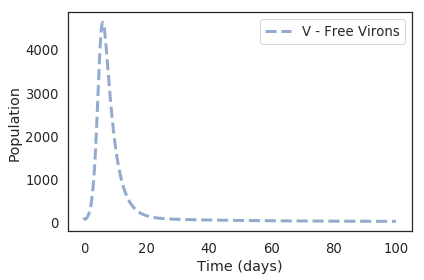

In [89]:
plot_resultsV(results.R, results.L, results.E, results.V)

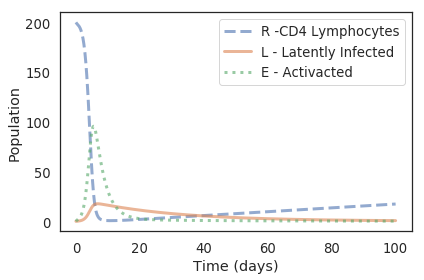

In [88]:
plot_resultsRLE(results.R, results.L, results.E, results.V)